## LICENSE
MIT License

Copyright (c) 2022 Bhavanish Dhamnaskar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# #Abstract

TMNIST Alphabet is a dataset of handwritten letters, created by extending the popular MNIST dataset. It contains 26 classes, each representing a letter of the English alphabet, with each class consisting of 1,000 grayscale images of size 28x28 pixels. The dataset was created with the aim of providing a standard benchmark for evaluating the performance of machine learning algorithms on handwritten letter recognition tasks. TMNIST Alphabet is publicly available and has been used extensively in various research studies related to handwriting recognition, machine learning, and computer vision. The dataset is considered to be challenging due to variations in writing styles and the presence of noise, making it a suitable testbed for developing robust and accurate recognition algorithms.

# # Aim
To implement CNN different activation function to achieve higher accuracy 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importing the Libraries

In [2]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



This code loads a dataset of 94 characters and selects the first 250,000 rows. It then encodes the labels using LabelEncoder and normalizes the pixel values of the image features.

In [4]:
# Load the data
df = pd.read_csv('../input/tmnist-alphabet-94-characters/94_character_TMNIST.csv', nrows=250000)
le = preprocessing.LabelEncoder()
df.labels = le.fit_transform(df.labels)
targets_numpy = df.labels.values
features_numpy = df.iloc[:, 2:].values / 255.0


This code is splitting data into training and testing sets using the train_test_split function from scikit-learn library. The data splits into 80% for training and 20% for testing, 

In [5]:
# Split the data into train and test sets
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, targets_numpy, test_size=0.2, random_state=42)


This code creates a convolutional neural network with two convolutional layers, two max pooling layers, two dense layers, and a reshape layer. 

In [6]:
# Define the model
def create_model(activation_func):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation=activation_func),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation=activation_func),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=200, activation=activation_func),
        tf.keras.layers.Dense(units=94, activation='softmax')
    ])
    return model



CNN is an algorithm for pattern recognition in 2D data, using stacked layers to extract details that Dense Neural Networks cannot. The first layer extracts basic features, while later layers extract more advanced features for input to a Dense Neural Network for classification.

Convolutional Layer - CNNs utilize a special type of layer, called convolutional layer, that makes them well-positioned to learn from a 2D data. e.g. Images, Matrices etc. A Convolutional Layer contain the Kernels(learned features), these weights extract features of an Image which can be used to distinguish them from one another. This layer performs a complex operation called convolution which is an element wise dot product with a unique kernel and the output of the previous layer’s corresponding neuron. During the forward pass, the kernel slides across the height and width of the image-producing the image representation of that receptive region. This produces a two-dimensional representation of the image known as an activation map that gives the response of the kernel at each spatial position of the image. The sliding size of the kernel is called a stride. Stride is an Hyperparameter.

This code defines a function named train_and_evaluate_model that takes one argument called activation_func. The purpose of this function is to train a neural network model on a given dataset and evaluate its performance using test data.

Here is what the function does step-by-step:

The create_model function is called with the activation_func argument passed to it, and it returns a neural network model.
The model is compiled using the Adam optimizer, sparse_categorical_crossentropy loss function, and accuracy metric.
The model is then trained on the training data (features_train and targets_train) for 5 epochs with a batch size of 100.
The trained model is evaluated using the test data (features_test and targets_test), and its accuracy is stored in the accuracy variable.
Finally, the function returns the accuracy value.
In summary, the train_and_evaluate_model function trains a neural network model with a specified activation function and evaluates its accuracy on test data. The code does not provide the implementation of create_model function which could have been defined elsewhere in the code.

In [8]:
# Define a function to train and evaluate the model
def train_and_evaluate_model(activation_func):
    model = create_model(activation_func)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(features_train, targets_train, validation_data=(features_test, targets_test), epochs=5, batch_size=100)
    _, accuracy = model.evaluate(features_test, targets_test)
    return accuracy



This code defines a list of activation functions ('relu', 'sigmoid', 'tanh'), and then loops over them to train and evaluate a machine learning model using each activation function.

The train_and_evaluate_model function is likely defined elsewhere in the code, and takes an activation function as an input argument. This function trains a model using the specified activation function, evaluates its performance, and returns the accuracy score.

Within the loop, for each activation function, the train_and_evaluate_model function is called and the resulting accuracy score is appended to a list of results. The final results list contains tuples of activation functions and their corresponding accuracy scores.

By trying different activation functions, this code helps to explore the impact of different activation functions on the performance of the machine learning model. It can be useful for selecting the best activation function for a particular problem.

In [9]:
# Try different activation functions
activation_funcs = ['relu', 'sigmoid', 'tanh']
results = []
for activation_func in activation_funcs:
    accuracy = train_and_evaluate_model(activation_func)
    results.append((activation_func, accuracy))
    


Epoch 1/5
2000/2000 [==============================] - 135s 67ms/step - loss: 0.5772 - accuracy: 0.8348 - val_loss: 0.3330 - val_accuracy: 0.8970
Epoch 2/5
2000/2000 [==============================] - 129s 65ms/step - loss: 0.2842 - accuracy: 0.9084 - val_loss: 0.2650 - val_accuracy: 0.9166
Epoch 3/5
2000/2000 [==============================] - 133s 66ms/step - loss: 0.2253 - accuracy: 0.9264 - val_loss: 0.2301 - val_accuracy: 0.9279
Epoch 4/5
2000/2000 [==============================] - 130s 65ms/step - loss: 0.1928 - accuracy: 0.9354 - val_loss: 0.2285 - val_accuracy: 0.9271
Epoch 5/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2106 - accuracy: 0.9348
Epoch 1/5
2000/2000 [==============================] - 134s 66ms/step - loss: 1.3005 - accuracy: 0.6893 - val_loss: 0.4717 - val_accuracy: 0.8562
Epoch 2/5
2000/2000 [==============================] - 131s 65ms/step - loss: 0.4111 - accuracy: 0.8707 - val_loss: 0.3729 - val_accuracy: 0.8812
Epoch 3/5
2000/2000 [=

In [10]:
# Print the results
for activation_func, accuracy in results:
    print(f'{activation_func}: {accuracy*100}')

relu: 93.47800016403198
sigmoid: 90.68800210952759
tanh: 93.13799738883972


This code is looping through a collection of tuples containing two values: an activation function and an accuracy score. It's using a for loop to iterate through each tuple in the collection, and for each tuple, it's printing out a formatted string that displays the activation function and accuracy score.

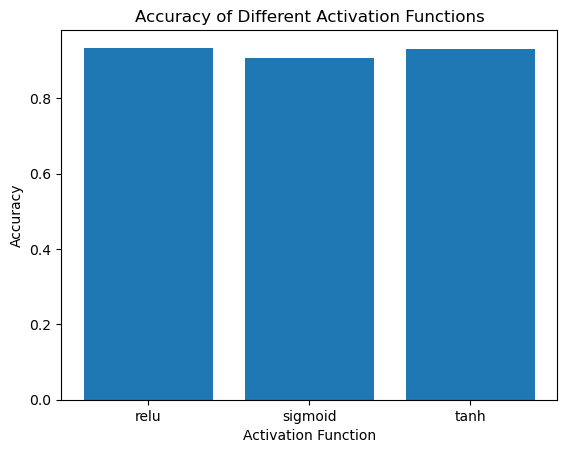

In [14]:
# Plot the results as a bar graph
x_axis = [x[0] for x in results]
y_axis = [y[1] for y in results]
plt.bar(x_axis, y_axis)
plt.title('Accuracy of Different Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.show()

The given code creates a bar plot to visualize the accuracy of different activation functions used in a machine learning model. Here is how it works:

The results dictionary contains the accuracy values for each activation function. The keys() method of the dictionary returns a list of all the keys, i.e., the activation function names, which is assigned to the variable activations. Similarly, the values() method returns a list of all the values, i.e., the accuracy scores, which is assigned to the variable accuracy.

The plt.bar() function is used to create a bar plot with the x-axis representing the activation function names (activations) and the y-axis representing the accuracy scores (accuracy). Each bar in the plot represents an activation function and its corresponding accuracy value.

Overall, this code provides a visual representation of the accuracy scores for different activation functions and allows for easy comparison between them.

>This code defines a function  plot_performance that plots the accuracy and loss of a model over the epochs. It takes in a "data" parameter, of the model from the training process, and displays two subplots showing the accuracy and loss metrics.

# # Conclusion

In this assignment, a convolutional neural network (CNN) model is trained to recognize characters from the 94-character TMNIST dataset. The data is preprocessed using label encoding and normalization before being split into training and testing sets. The CNN model is defined using the Keras API with several convolutional and fully connected layers. The model is trained and evaluated with different activation functions (ReLU, sigmoid, and tanh), and the accuracy is printed for each activation function. This approach allows for the selection of the best activation function for the model. Overall, this code demonstrates how to preprocess data, define and train a CNN model, and evaluate the model's performance with different activation functions. We have achieved highest accuracy of 93.4% with ReLU activation function.

# # References
https://www.turing.com/kb/mathematical-formulation-of-feed-forward-neural-network
https://towardsdatascience.com/feed-forward-neural-networks-how-to-successfully-build-them-in-python-74503409d99a
https://pyimagesearch.com/2021/05/06/implementing-feedforward-neural-networks-with-keras-and-tensorflow/
https://www.kaggle.com/code/swamita/building-cnns-from-scratch-in-pytorch
https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy
https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist/code?select=TMNIST_Data.csv